<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#第3章　簡単なサンプルで学ぶTensorFlowの基本" data-toc-modified-id="第3章　簡単なサンプルで学ぶTensorFlowの基本-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>第3章　簡単なサンプルで学ぶTensorFlowの基本</a></span></li></ul></div>

# 第3章　簡単なサンプルで学ぶTensorFlowの基本

In [628]:
# Ubuntu環境の場合は以下のコマンドで IPAexGothicを入れることができる
# !apt-get install  -y fonts-ipaexfont
# フォントのキャッシュを削除
# !rm ~/.cache/matplotlib/fontList.json

**フォントを使うには、IPAexGothicを入れた後で、一度 Kernel > Restart を実行する必要があります。なおWindows環境の場合はP.076の方法でIPAexGothicをインストールしてください。**

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

**リスト3.1:TensorFlow による1+1**

In [2]:
import tensorflow as tf


a = tf.constant(1, name='a')
b = tf.constant(1, name='b')
c = a + b

with tf.Session() as sess:
    print(sess.run(c))

2


**リスト3.2:演算結果の型を調べる**

In [3]:
import tensorflow as tf


a = tf.constant(1, name='a')
b = tf.constant(1, name='b')
c = a + b

print(c)

Tensor("add_1:0", shape=(), dtype=int32)


**Tensorboard起動**

Anaconda Prompt- Jupyter起動させる

(base) C:\Users\a4070>cd C:\Users\a4070\Python\Jupyter\PythonAI_14

(base) C:\Users\a4070\Python\Jupyter\PythonAI_14>tensorboard --logdir=logs

In [5]:
LOG_DIR = './logs'
graph = tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer:
    writer.add_graph(graph)

http://localhost:6006/

W1204 11:00:23.120339 Reloader tf_logging.py:120] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.

W1204 11:00:23.120339 19020 tf_logging.py:120] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.

events.out.tfevents.1543888820.PC-A4070-1807-1

![CNT](TensorBoard_0.png "CNT")

In [6]:
# リスト3.3の結果がわかりづらくならいよう、グラフをリセットする
tf.reset_default_graph()

In [7]:
LOG_DIR = './logs'
graph = tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer:
    writer.add_graph(graph)

http://localhost:6006/

events.out.tfevents.1543889519.PC-A4070-1807-1

![CNT](TensorBoard_1.png "CNT")

**リスト3.3:データフロ ーグラフの 定義の表示。出力を見ると、aやaddがノードとな っていることがわかる**

In [10]:
import tensorflow as tf


a = tf.constant(1, name='a')
b = tf.constant(1, name='b')
c = a + b

graph = tf.get_default_graph()
print(graph.as_graph_def())

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "add"
  op: "Add"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "a_1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b_1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

In [12]:
LOG_DIR = './logs'
graph = tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer:
    writer.add_graph(graph)

http://localhost:6006/

events.out.tfevents.1543889806.PC-A4070-1807-1

![CNT](TensorBoard_2.png "CNT")

**リスト3.4:変数の例**

In [13]:
import tensorflow as tf


a = tf.Variable(1, name='a')
b = tf.constant(1, name='b')
c = tf.assign(a, a + b)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('一回目: [c, a] =', sess.run([c, a]))
    # 変数 c が更新されている
    print('二回目: [c, a] =', sess.run([c, a])) 

一回目: [c, a] = [2, 2]
二回目: [c, a] = [3, 3]


In [14]:
LOG_DIR = './logs'
graph = tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer:
    writer.add_graph(graph)

http://localhost:6006/

events.out.tfevents.1543890298.PC-A4070-1807-1

![CNT](TensorBoard_3.png "CNT")

**リスト3.5:プレースホルダーの例**

In [15]:
import tensorflow as tf


a = tf.placeholder(dtype=tf.int32, name='a')
b = tf.constant(1, name='b')
c = a + b

with tf.Session() as sess:
    print('a + b =', sess.run(c, feed_dict={a: 1}))

a + b = 2


In [16]:
LOG_DIR = './logs'
graph = tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer:
    writer.add_graph(graph)

http://localhost:6006/

events.out.tfevents.1543890604.PC-A4070-1807-1

![CNT](TensorBoard_4.png "CNT")

**リスト3.6:演算の例**

In [17]:
import tensorflow as tf


a = tf.constant(2, name='a')
b = tf.constant(3, name='b')
c = tf.add(a, b)  # a + b と等価
d = tf.multiply(a, b)  # a*b と等価

with tf.Session() as sess:
    print('a + b = ', sess.run(c))
    print('a * b = ', sess.run(d))

a + b =  5
a * b =  6


In [18]:
LOG_DIR = './logs'
graph = tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer:
    writer.add_graph(graph)

http://localhost:6006/

events.out.tfevents.1543890872.PC-A4070-1807-1

![CNT](TensorBoard_5.png "CNT")

**リスト3.7:ベクトル演算の例**

In [19]:
import tensorflow as tf


a = tf.constant([1, 2, 3], name='a')
b = tf.constant([4, 5, 6], name='b')
c = a + b

with tf.Session() as sess:
    print('a + b = ', sess.run(c))

a + b =  [5 7 9]


In [20]:
LOG_DIR = './logs'
graph = tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer:
    writer.add_graph(graph)

http://localhost:6006/

events.out.tfevents.1543891048.PC-A4070-1807-1

![CNT](TensorBoard_6.png "CNT")

**リスト3.8:行列演算の例**

In [21]:
import tensorflow as tf


a = tf.constant([[1, 2], [3, 4]], name='a')
b = tf.constant([[1], [2]], name='b')
c = tf.matmul(a, b)

print('shape of a: ', a.shape)
print('shape of b: ', b.shape)
print('shape of c: ', c.shape)

with tf.Session() as sess:
    print('a = \n', sess.run(a))
    print('b = \n', sess.run(b))
    print('c = \n', sess.run(c))

shape of a:  (2, 2)
shape of b:  (2, 1)
shape of c:  (2, 1)
a = 
 [[1 2]
 [3 4]]
b = 
 [[1]
 [2]]
c = 
 [[ 5]
 [11]]


In [22]:
LOG_DIR = './logs'
graph = tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer:
    writer.add_graph(graph)

http://localhost:6006/

events.out.tfevents.1543891247.PC-A4070-1807-1

![CNT](TensorBoard_7.png "CNT")

**リスト3.9:テンソルのプ レースホルダーと未知の次元**

In [23]:
import tensorflow as tf

a = tf.placeholder(shape=(None, 2), dtype=tf.int32, name='a')

with tf.Session() as sess:
    print('-- [[1, 2]]を代入 --')
    print('a = ', sess.run(a, feed_dict={a: [[1, 2]]}))
    print('\n-- [[1, 2], [3, 4]]を代入 --')
    print('a = ', sess.run(a, feed_dict={a: [[1, 2], [3, 4]]}))

-- [[1, 2]]を代入 --
a =  [[1 2]]

-- [[1, 2], [3, 4]]を代入 --
a =  [[1 2]
 [3 4]]


In [24]:
LOG_DIR = './logs'
graph = tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer:
    writer.add_graph(graph)

http://localhost:6006/

events.out.tfevents.1543891486.PC-A4070-1807-1

![CNT](TensorBoard_8.png "CNT")

**リスト3.10:セッションが変わると、変数が初期化されてしまう**

In [25]:
import tensorflow as tf


a = tf.Variable(1, name='a')
b = tf.assign(a, a + 1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('一回目 b = ', sess.run(b))
    print('二回目 b = ', sess.run(b))

# セッションが変わると元の値に戻ってしまう
with tf.Session() as sess:
    print('-- 新しいセッション --')
    sess.run(tf.global_variables_initializer())
    print('一回目 b = ', sess.run(b))
    print('二回目 b = ', sess.run(b))

一回目 b =  2
二回目 b =  3
-- 新しいセッション --
一回目 b =  2
二回目 b =  3


In [26]:
LOG_DIR = './logs'
graph = tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer:
    writer.add_graph(graph)

http://localhost:6006/

events.out.tfevents.1543899197.PC-A4070-1807-1

![CNT](TensorBoard_9.png "CNT")

**リスト3.11:Saver による変数の保存**

In [27]:
import tensorflow as tf


a = tf.Variable(1, name='a')
b = tf.assign(a, a + 1)

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(b))
    print(sess.run(b))
    # 変数の値を model/model.ckpt に保存する
    saver.save(sess, 'model/model.ckpt')

# Saver を利用すると
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # model/model.ckpt から変数の値をリストアする
    saver.restore(sess, save_path='model/model.ckpt')
    print(sess.run(b))
    print(sess.run(b))

2
3
INFO:tensorflow:Restoring parameters from model/model.ckpt
4
5


In [28]:
LOG_DIR = './logs'
graph = tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer:
    writer.add_graph(graph)

http://localhost:6006/

events.out.tfevents.1543899346.PC-A4070-1807-1

![CNT](TensorBoard_10.png "CNT")

**リスト3.12:サマリの書き出し**

In [29]:
import tensorflow as tf


LOG_DIR = './logs'

a = tf.constant(1, name='a')
b = tf.constant(1, name='b')
c = a + b

graph = tf.get_default_graph()
with tf.summary.FileWriter(LOG_DIR) as writer:
    writer.add_graph(graph)

http://localhost:6006/

events.out.tfevents.1543899545.PC-A4070-1807-1

![CNT](TensorBoard_11.png "CNT")

LOG_DIRの確認

In [30]:
# !ls ./logs
!dir logs

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は 2E66-D345 です

 C:\Users\a4070\Python\Jupyter\PythonAI_14\logs のディレクトリ

2018/12/04  13:59    <DIR>          .
2018/12/04  13:59    <DIR>          ..
2018/12/04  11:00               460 events.out.tfevents.1543888820.PC-A4070-1807-1
2018/12/04  11:11                71 events.out.tfevents.1543889519.PC-A4070-1807-1
2018/12/04  11:16               261 events.out.tfevents.1543889806.PC-A4070-1807-1
2018/12/04  11:24             1,167 events.out.tfevents.1543890298.PC-A4070-1807-1
2018/12/04  11:30             1,371 events.out.tfevents.1543890604.PC-A4070-1807-1
2018/12/04  11:34             1,625 events.out.tfevents.1543890872.PC-A4070-1807-1
2018/12/04  11:37             1,866 events.out.tfevents.1543891048.PC-A4070-1807-1
2018/12/04  11:40             2,169 events.out.tfevents.1543891247.PC-A4070-1807-1
2018/12/04  11:44             2,273 events.out.tfevents.1543891486.PC-A4070-1807-1
2018/12/04  13:53             3,048 events.out.tfevents.154

Tensorboard起動

①　Anaconda Prompt- Jupyter　を起動しPromptを出す。

②　所望のデイレクリに移動する。

③　tensorboard --logdir=logs　を実行する

④　TensorBoard 1.11.0 at http://PC-A4070-1807-1:6006 (Press CTRL+C to quit)が表示されたら　http://localhost:6006/　にアクセスする。

⑤　表示される

以下、実行結果の表示（ログ）

(base) C:\Users\a4070>cd C:\Users\a4070\Python\Jupyter\PythonAI_14

(base) C:\Users\a4070\Python\Jupyter\PythonAI_14>tensorboard --logdir=logs
W1204 09:48:21.949468 Reloader tf_logging.py:120] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W1204 09:48:21.949467 19020 tf_logging.py:120] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W1204 09:48:22.051740 Reloader tf_logging.py:120] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W1204 09:48:22.051740 19020 tf_logging.py:120] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
TensorBoard 1.11.0 at http://PC-A4070-1807-1:6006 (Press CTRL+C to quit)

上記URLではtensorboardが表示されない (NG  http://PC-A4070-1807-1:6006)

以下で表示可能となる　　　　　　　　（OK　http://localhost:6006/）

http://localhost:6006/

![CNT](TensorBoard_12.png "CNT")

**リスト3.13:最急降下法による２次関数の最小化**

In [2]:
import numpy as np
import math
from scipy.interpolate import interp1d

Min_data = np.zeros(20)
num = np.zeros(20)

for n in range(20):
    num[n]=n/20
    
Houbutsu_data1 = np.zeros(100)
num1 = np.zeros(100)
for n in range(100):
    num1[n]=n/50
    #Houbutsu_data1[n] = 0.8*(num1[n]-1)**2
    Houbutsu_data1[n] = 1 - 0.8*(num1[n]-1)**2
    
Houbutsu_data2 = np.zeros(100)
num2 = np.zeros(100)
for n in range(100):
    num2[n]=n/50
    # Houbutsu_data2[n] = 4-2*math.sqrt(4-(num2[n]-1)**2)
    Houbutsu_data2[n] = 6-3*math.sqrt(4-(num2[n]-1)**2)

Houbutsu_data3 = np.zeros(100)
num3 = np.zeros(100)
for n in range(100):
    num3[n]=n/50

for i in range(20):
    print('num[i] = ', num[i])

num[i] =  0.0
num[i] =  0.05
num[i] =  0.1
num[i] =  0.15
num[i] =  0.2
num[i] =  0.25
num[i] =  0.3
num[i] =  0.35
num[i] =  0.4
num[i] =  0.45
num[i] =  0.5
num[i] =  0.55
num[i] =  0.6
num[i] =  0.65
num[i] =  0.7
num[i] =  0.75
num[i] =  0.8
num[i] =  0.85
num[i] =  0.9
num[i] =  0.95


In [3]:
import tensorflow as tf


# パラメータは変数として定義
x = tf.Variable(0., name='x')
# パラメータを使って最小化したい関数を定義
func = (x - 1)**2

# learning_rate は一度にずらす大きさを決める
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.1
) 
# train_step が x を少しずらす操作を表す
train_step = optimizer.minimize(func)

# train_step を繰り返し実行する
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20):
        sess.run(train_step)
        Min_data[i] = 1 - sess.run(x) # 経過LOG
        num[i] = 0.05*i 
        print('x(i) = ', sess.run(x))
        print('num(i) = ', num[i])
    print('x = ', sess.run(x))
    


x(i) =  0.2
num(i) =  0.0
x(i) =  0.36
num(i) =  0.05
x(i) =  0.48800004
num(i) =  0.1
x(i) =  0.59040004
num(i) =  0.15000000000000002
x(i) =  0.67232
num(i) =  0.2
x(i) =  0.73785603
num(i) =  0.25
x(i) =  0.7902848
num(i) =  0.30000000000000004
x(i) =  0.8322278
num(i) =  0.35000000000000003
x(i) =  0.86578226
num(i) =  0.4
x(i) =  0.8926258
num(i) =  0.45
x(i) =  0.91410065
num(i) =  0.5
x(i) =  0.9312805
num(i) =  0.55
x(i) =  0.9450244
num(i) =  0.6000000000000001
x(i) =  0.9560195
num(i) =  0.65
x(i) =  0.9648156
num(i) =  0.7000000000000001
x(i) =  0.9718525
num(i) =  0.75
x(i) =  0.97748196
num(i) =  0.8
x(i) =  0.98198557
num(i) =  0.8500000000000001
x(i) =  0.98558843
num(i) =  0.9
x(i) =  0.98847073
num(i) =  0.9500000000000001
x =  0.98847073


3次スプライン補間

In [4]:
Houbutsu_data3 = interp1d(num, Min_data, kind='cubic')  #3次スプライン補間実行！
xnew =np.linspace(0,0.95,num=20)
print('xnew = ', xnew)
# print('Houbutsu_data3 = ', Houbutsu_data3)

xnew =  [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]


In [6]:
import matplotlib.pyplot as plt
# 経過LOG

plt.plot(num, Min_data, color='red',  linestyle='--', marker='.')
plt.plot(num1, Houbutsu_data1, color='blue',  linestyle='--', marker='.')
plt.plot(num2, Houbutsu_data2, color='green',  linestyle='--', marker='.')
#plt.plot(num, Min_data, 'o',   xnew, Houbutsu_data3(xnew), '-')
plt.grid(True)
plt.ylim(0, 1.0)
plt.xlim(0, 2)
#plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

(0, 2)

3次スプライン補間 表示

(0, 2)

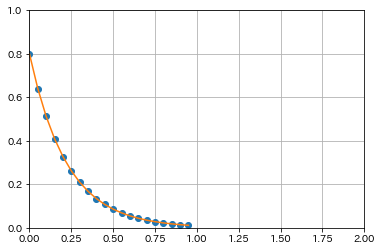

In [7]:
plt.plot(num, Min_data, 'o',   xnew, Houbutsu_data3(xnew), '-')
plt.grid(True)
plt.ylim(0, 1.0)
plt.xlim(0, 2)

近似曲線

numpyによる方法

polyfit

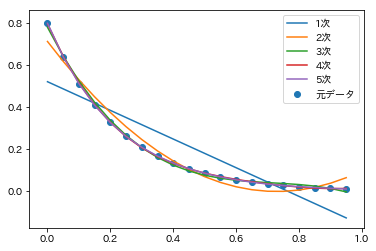

In [8]:
#近似式の係数
res1=np.polyfit(num, Min_data, 1)
res2=np.polyfit(num, Min_data, 2)
res3=np.polyfit(num, Min_data, 3)
res4=np.polyfit(num, Min_data, 4)
res5=np.polyfit(num, Min_data, 5)

#近似式の計算
y1 = np.poly1d(res1)(num) #1次
y2 = np.poly1d(res2)(num) #2次
y3 = np.poly1d(res3)(num) #3次
y4 = np.poly1d(res4)(num) #4次
y5 = np.poly1d(res5)(num) #5次

#グラフ表示
plt.scatter(num, Min_data, label='元データ')
plt.plot(num, y1, label='1次')
plt.plot(num, y2, label='2次')
plt.plot(num, y3, label='3次')
plt.plot(num, y4, label='4次')
plt.plot(num, y5, label='5次')
plt.legend()
plt.show()

In [9]:
print('係数１次 = ', res1)
print('係数２次 = ', res2)
print('係数３次 = ', res3)
print('係数４次 = ', res4)
print('係数５次 = ', res5)

係数１次 =  [-0.68176517  0.52153262]
係数２次 =  [ 1.34233264 -1.95698117  0.71281502]
係数３次 =  [-1.85510331  3.98585485 -2.93601194  0.78022484]
係数４次 =  [ 1.97177088 -5.60146798  6.23719467 -3.38423772  0.7966018 ]
係数５次 =  [-1.70039385  6.01020626 -8.97391577  7.39824484 -3.52726766  0.79954409]


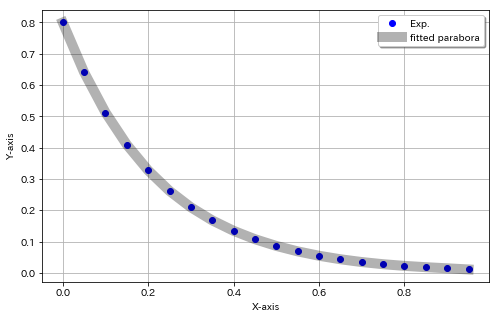

In [10]:
plt.figure(figsize=(8,5))
plt.plot(num,Min_data,'bo', label='Exp.')
plt.plot(num,res5[0]*num**5+res5[1]*num**4+res5[2]*num**3+res5[3]*num**2+res5[4]*num+res5[5],'k-', label='fitted parabora', linewidth=10, alpha=0.3)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [11]:
y = Min_data
x = num
# print('Min_data = ', Min_data)
# print('y = ', y)

近似曲線

scipyによる方法

leastsqによる近似

参考 http://www2.kaiyodai.ac.jp/~kentaro/materials/new_HP/python/15fit_data3.html

参考 https://qiita.com/wrblue_mica34/items/0f26612207b78b68c4a1
     

In [13]:
from scipy import optimize

# 1次式の近似
def func1(param,x,y):
    residual = y - (param[0]*x + param[1])
    return residual
param1 = [0, 0]
res_leas1 = optimize.leastsq(func1, param1, args=(x, y))#係数
a_fit1=res_leas1[0][0]
b_fit1=res_leas1[0][1]
print(a_fit1,b_fit1)

# 2次式の近似
def func2(param,x,y):
    residual = y - (param[0]*x**2 + param[1]*x + param[2])
    return residual
param2 = [0, 0, 0]
res_leas2 = optimize.leastsq(func2, param2, args=(x, y))
a_fit2=res_leas2[0][0]
b_fit2=res_leas2[0][1]
c_fit2=res_leas2[0][2]
print(a_fit2,b_fit2,c_fit2)

# 3次式の近似
def func3(param,x,y):
    residual = y - (param[0]*x**3 + param[1]*x**2 + param[2]*x + param[3])
    return residual
param3 = [0, 0, 0, 0]
res_leas3 = optimize.leastsq(func3, param3, args=(x, y))
a_fit3=res_leas3[0][0]
b_fit3=res_leas3[0][1]
c_fit3=res_leas3[0][2]
d_fit3=res_leas3[0][3]
print(a_fit3,b_fit3,c_fit3,d_fit3)

# 4次式の近似
def func4(param,x,y):
    residual = y - (param[0]*x**4 + param[1]*x**3 + param[2]*x**2 + param[3]*x + param[4])
    return residual
param4 = [0, 0, 0, 0, 0]
res_leas4 = optimize.leastsq(func4, param4, args=(x, y))
a_fit4=res_leas4[0][0]
b_fit4=res_leas4[0][1]
c_fit4=res_leas4[0][2]
d_fit4=res_leas4[0][3]
e_fit4=res_leas4[0][4]
print(a_fit4,b_fit4,c_fit4,d_fit4,e_fit4)

# 5次式の近似
def func5(param,x,y):
    residual = y - (param[0]*x**5 + param[1]*x**4 + param[2]*x**3 + param[3]*x**2 + param[4]*x + param[5])
    return residual
param5 = [0, 0, 0, 0, 0, 0]
res_leas5 = optimize.leastsq(func5, param5, args=(x, y))
a_fit5=res_leas5[0][0]
b_fit5=res_leas5[0][1]
c_fit5=res_leas5[0][2]
d_fit5=res_leas5[0][3]
e_fit5=res_leas5[0][4]
f_fit5=res_leas5[0][5]
print(a_fit5,b_fit5,c_fit5,d_fit5,e_fit5,f_fit5)

-0.6817651672489452 0.5215326211021231
1.3423326355091147 -1.9569811712557243 0.7128150218940751
-1.8551033271550972 3.9858548761190424 -2.936011951615773 0.7802248389548224
1.9717711462153815 -5.601468494003642 6.237194988326187 -3.384237780824525 0.7966018065313463
-1.7003935851739225 6.010205625598366 -8.973915220993739 7.39824464553472 -3.527267633529383 0.7995440919917078


In [415]:
print('係数１次 res_leas1 = ', res_leas1)
print('係数２次 res_leas2 = ', res_leas2)
print('係数３次 res_leas3 = ', res_leas3)
print('係数４次 res_leas4 = ', res_leas4)
print('係数５次 res_leas5 = ', res_leas5)

係数１次 res_leas1 =  (array([-0.68176517,  0.52153262]), 3)
係数２次 res_leas2 =  (array([ 1.34233264, -1.95698117,  0.71281502]), 2)
係数３次 res_leas3 =  (array([-1.85510333,  3.98585488, -2.93601195,  0.78022484]), 3)
係数４次 res_leas4 =  (array([ 1.97177115, -5.60146849,  6.23719499, -3.38423778,  0.79660181]), 1)
係数５次 res_leas5 =  (array([-1.70039359,  6.01020563, -8.97391522,  7.39824465, -3.52726763,
        0.79954409]), 1)


In [15]:
print(a_fit5,b_fit5,c_fit5,d_fit5,e_fit5,f_fit5)

-1.7003935851739225 6.010205625598366 -8.973915220993739 7.39824464553472 -3.527267633529383 0.7995440919917078


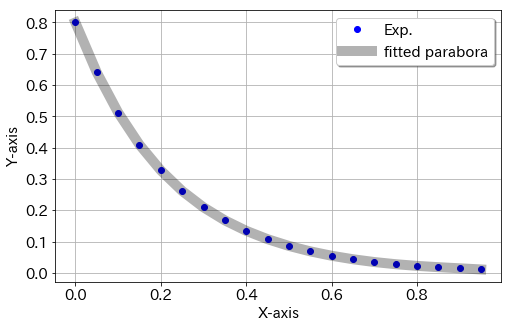

In [417]:
#PLot
plt.figure(figsize=(8,5))
plt.plot(x,y,'bo', label='Exp.')
plt.plot(x,a_fit5*x**5+b_fit5*x**4+c_fit5*x**3+d_fit5*x**2+e_fit5*x+f_fit5,'k-', label='fitted parabora', linewidth=10, alpha=0.3)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

近似曲線

curve_fitによる近似

In [418]:
from scipy import optimize

# 1次式の近似
def func_c1(x, a1, b1):
    return a1*x + b1
res_c1 = optimize.curve_fit(func_c1, x, y)#係数

# 2次式の近似
def func_c2(x, a2, b2, c2):
    return a2*x**2 + b2*x + c2
res_c2 = optimize.curve_fit(func_c2, x, y)

# 3次式の近似
def func_c3(x, a3, b3, c3, d3):
    return a3*x**3 + b3*x**2 + c3*x +d3
res_c3 = optimize.curve_fit(func_c3, x, y)

# 4次式の近似
def func_c4(x, a4, b4, c4, d4, e4):
    return a4*x**4 + b4*x**3 + c4*x**2 +d4*x +e4
res_c4 = optimize.curve_fit(func_c4, x, y)

# 5次式の近似
def func_c5(x, a5, b5, c5, d5, e5 ,f5):
    return a5*x**5 + b5*x**4 + c5*x**3 +d5*x**2 +e5*x +f5
res_c5 = optimize.curve_fit(func_c5, x, y)

In [419]:
print('係数１次 res_c1 = ', res_c1)
print('係数２次 res_c2 = ', res_c2)
print('係数３次 res_c3 = ', res_c3)
print('係数４次 res_c4 = ', res_c4)
print('係数５次 res_c5 = ', res_c5)

係数１次 res_c1 =  (array([-0.68176517,  0.52153262]), array([[ 0.00745682, -0.00354199],
       [-0.00354199,  0.00230229]]))
係数２次 res_c2 =  (array([ 1.34233263, -1.95698117,  0.71281502]), array([[ 0.01363662, -0.01295479,  0.00194322],
       [-0.01295479,  0.01320707, -0.00227357],
       [ 0.00194322, -0.00227357,  0.00055479]]))
係数３次 res_c3 =  (array([-1.85510329,  3.98585482, -2.93601193,  0.78022484]), array([[ 1.54829278e-02, -2.20631719e-02,  8.17111504e-03,
        -5.62610877e-04],
       [-2.20631719e-02,  3.24129559e-02, -1.25681282e-02,
         9.40363893e-04],
       [ 8.17111504e-03, -1.25681282e-02,  5.25459457e-03,
        -4.59130666e-04],
       [-5.62610877e-04,  9.40363893e-04, -4.59130666e-04,
         6.00265630e-05]]))
係数４次 res_c4 =  (array([ 1.97177084, -5.6014679 ,  6.23719463, -3.38423771,  0.7966018 ]), array([[ 1.17592111e-02, -2.23425012e-02,  1.34264994e-02,
        -2.67312071e-03,  9.76686432e-05],
       [-2.23425012e-02,  4.31675046e-02, -2.65317206e-0

In [420]:
a5=res_c5[0][0]
b5=res_c5[0][1]
c5=res_c5[0][2]
d5=res_c5[0][3]
e5=res_c5[0][4]
f5=res_c5[0][5]

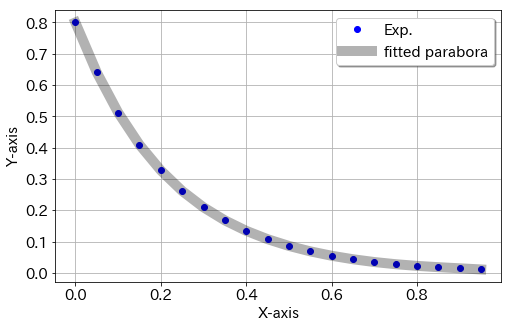

In [421]:
#PLot
plt.figure(figsize=(8,5))
plt.plot(x,y,'bo', label='Exp.')
plt.plot(x,a5*x**5+b5*x**4+c5*x**3+d5*x**2+e5*x+f5,'k-', label='fitted parabora', linewidth=10, alpha=0.3)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

** フィッティング３(最小二乗法，optimizeの利用) **

http://www2.kaiyodai.ac.jp/~kentaro/materials/new_HP/python/15fit_data3.html

(array([ 4.98684278, 10.18823929]), 2)
4.986842777041219 10.188239294913


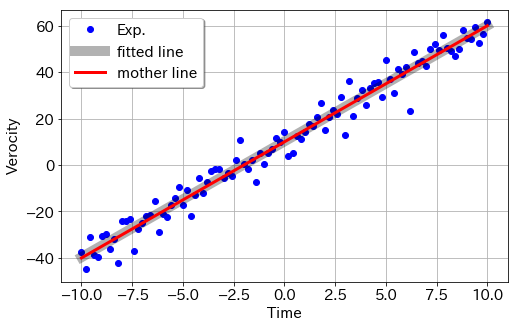

In [425]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def f(x):
    return 5.*x + 10.

#Pusedo measured data by random number
xdata = np.linspace(-10, 10, num=101)
np.random.seed(1234)
ydata = f(xdata) + 5.*np.random.randn(xdata.size)

#Least squares method with scipy.optimize
def fit_func(parameter,x,y):
    a = parameter[0]
    b = parameter[1]
    residual = y-(a*x+b)
    return residual

parameter0 = [0.,0.]
result = optimize.leastsq(fit_func,parameter0,args=(xdata,ydata))
print(result)
a_fit=result[0][0]
b_fit=result[0][1]

print(a_fit,b_fit)

#PLot
plt.figure(figsize=(8,5))
plt.plot(xdata,ydata,'bo', label='Exp.')
plt.plot(xdata,a_fit*xdata+b_fit,'k-', label='fitted line', linewidth=10, alpha=0.3)
plt.plot(xdata,f(xdata),'r-', label='mother line', linewidth=3)
plt.xlabel('Time')
plt.ylabel('Verocity')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

0.8872050729458443 0.41856718927924796 5.73655692206277


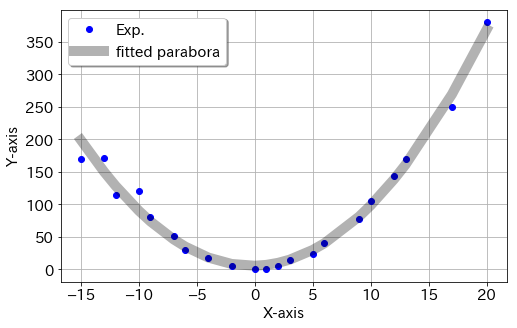

In [440]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

file_id = 'sample_data.csv'
file_path = 'C:/Users/a4070/Python/Jupyter/PythonAI_14/'
#file_path = './'

rfile = file_path + file_id
data = np.loadtxt(rfile, comments='#' ,delimiter=',')

x_csv = data[:,0]
y_csv = data[:,1]

#Least squares method with scipy.optimize
def fit_func(parameter,x,y):
    a = parameter[0]
    b = parameter[1]
    c = parameter[2]
    residual = y-(a*x**2+b*x+c)
    return residual

parameter0 = [0.,0.,0.]
result = optimize.leastsq(fit_func,parameter0,args=(x_csv,y_csv))
a_fit=result[0][0]
b_fit=result[0][1]
c_fit=result[0][2]
print(a_fit,b_fit,c_fit)

#PLot
plt.figure(figsize=(8,5))
plt.plot(x_csv,y_csv,'bo', label='Exp.')
plt.plot(x_csv,a_fit*x_csv**2+b_fit*x_csv+c_fit,'k-', label='fitted parabora', linewidth=10, alpha=0.3)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

**リスト3.14:Bos ton house -pricesデ ータセ ットのダウンロ ード**

In [61]:
# TensorFlow r1.5.0 では、Kerasのバグのためエラーとなる
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

上記のデータセットは、もう1つのkeras実装を使うことでダウンロードできます。誌面ではpip install kerasを利用した方法を紹介しています。以下のコマンドでもインストールできます。

In [66]:
#!pip install keras

Requirement already satisfied: keras in c:\users\a4070\appdata\local\continuum\anaconda3\lib\site-packages (2.2.4)

Requirement already satisfied: scipy>=0.14 in c:\users\a4070\appdata\local\continuum\anaconda3\lib\site-packages (from keras) (1.1.0)

Requirement already satisfied: pyyaml in c:\users\a4070\appdata\local\continuum\anaconda3\lib\site-packages (from keras) (3.12)

Requirement already satisfied: h5py in c:\users\a4070\appdata\local\continuum\anaconda3\lib\site-packages (from keras) (2.8.0)

Requirement already satisfied: keras-applications>=1.0.6 in c:\users\a4070\appdata\local\continuum\anaconda3\lib\site-packages (from keras) (1.0.6)

Requirement already satisfied: keras-preprocessing>=1.0.5 in c:\users\a4070\appdata\local\continuum\anaconda3\lib\site-packages (from keras) (1.0.5)

Requirement already satisfied: numpy>=1.9.1 in c:\users\a4070\appdata\local\continuum\anaconda3\lib\site-packages (from keras) (1.15.3)

Requirement already satisfied: six>=1.9.0 in c:\users\a4070\appdata\local\continuum\anaconda3\lib\site-packages (from keras) (1.11.0)

**リスト3.15:Kerasのインポート**

In [423]:
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

**リスト3.16:ヒストグラムを表示**

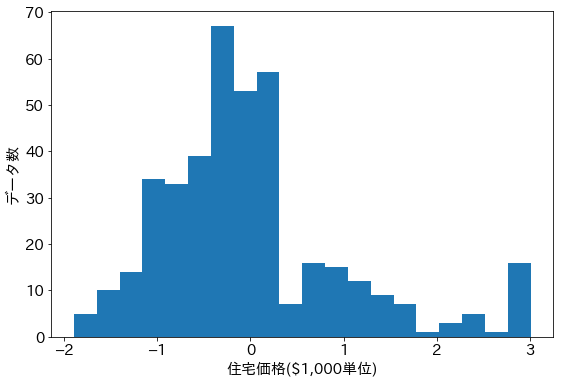

Text(0,0.5,'住宅価格($1,000単位)')

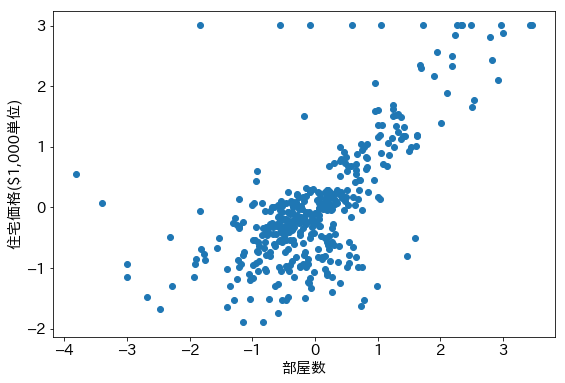

In [562]:
# matplotlibのグラフをインラインで表示する
%matplotlib inline

import matplotlib.pyplot as plt


plt.rcParams['font.family'] = ['IPAexGothic']
plt.rcParams['font.size'] = 5*3           # 10*3
plt.rcParams['figure.figsize'] = [9, 6]   # [18,12]

plt.hist(y_train, bins=20)
plt.xlabel('住宅価格($1,000単位)')
plt.ylabel('データ数')
plt.show()
plt.plot(x_train[:, 5], y_train, 'o')
plt.xlabel('部屋数')
plt.ylabel('住宅価格($1,000単位)')

**リスト3.17:データの 標準化**

Text(0,0.5,'住宅価格(標準化後)')

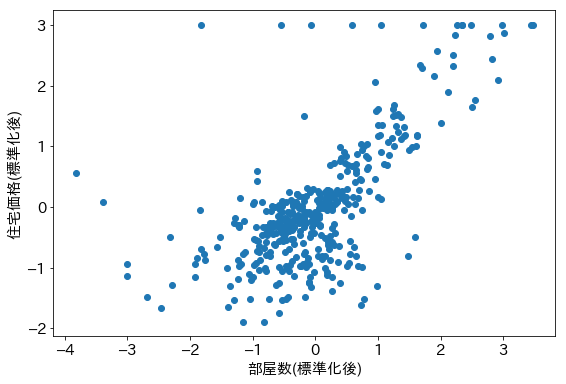

In [563]:
x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)
y_train_mean = y_train.mean()
y_train_std = y_train.std()

x_train = (x_train - x_train_mean)/x_train_std
y_train = (y_train - y_train_mean)/y_train_std
# x_test に対しても x_train_mean と x_train_std を使う
x_test = (x_test - x_train_mean)/x_train_std
# y_test に対しても y_train_mean と y_train_std を使う
y_test = (y_test - y_train_mean)/y_train_std


plt.plot(x_train[:, 5], y_train, 'o')
plt.xlabel('部屋数(標準化後)')
plt.ylabel('住宅価格(標準化後)')

**リスト3.18:住宅価格を推定するモデル**

In [564]:
# 説明変数用のプレースホルダー
x = tf.placeholder(tf.float32, (None, 13), name='x')
# 正解データ(住宅価格)用のプレースホルダー
y = tf.placeholder(tf.float32, (None, 1), name='y')

# 説明変数を重み w で足し合わせただけの簡単なモデル
w = tf.Variable(tf.random_normal((13, 1)))
pred = tf.matmul(x, w)

**リスト3.19:誤差の定義とtrain_stepの定義**

In [565]:
# 実データと推定値の差の二乗の平均を誤差とする
loss = tf.reduce_mean((y - pred)**2)
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.1
)
train_step = optimizer.minimize(loss)

**リスト3.20:学習のル ープ**

In [566]:
import numpy as np
Train_loss_data = np.zeros(100)
num = np.zeros(100)

for n in range(100):
    num[n]=n

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(100):
        # train_step が None を返すので、 _ で受けておく
        train_loss, _ = sess.run(
            [loss, train_step],
            feed_dict={
                x: x_train,
                # y_trainとyの次元を揃えるためにreshapeが必要
                y: y_train.reshape((-1, 1))
            }
        )
        print('step: {}, train_loss: {}'.format(
            step, train_loss
        ))
        Train_loss_data[step] = train_loss

    # 学習が終わったら、評価用データに対して予測してみる
    pred_ = sess.run(
        pred,
        feed_dict={
            x: x_test
        }
    )


step: 0, train_loss: 25.950313568115234
step: 1, train_loss: 7.779414653778076
step: 2, train_loss: 5.406745433807373
step: 3, train_loss: 4.277370452880859
step: 4, train_loss: 3.4737861156463623
step: 5, train_loss: 2.868887186050415
step: 6, train_loss: 2.4048938751220703
step: 7, train_loss: 2.0440008640289307
step: 8, train_loss: 1.7598944902420044
step: 9, train_loss: 1.5337834358215332
step: 10, train_loss: 1.351990818977356
step: 11, train_loss: 1.2044094800949097
step: 12, train_loss: 1.0834746360778809
step: 13, train_loss: 0.9834659695625305
step: 14, train_loss: 0.9000201225280762
step: 15, train_loss: 0.8297820687294006
step: 16, train_loss: 0.7701560854911804
step: 17, train_loss: 0.7191199660301208
step: 18, train_loss: 0.6750891804695129
step: 19, train_loss: 0.6368153095245361
step: 20, train_loss: 0.6033084392547607
step: 21, train_loss: 0.5737796425819397
step: 22, train_loss: 0.5475960373878479
step: 23, train_loss: 0.5242471694946289
step: 24, train_loss: 0.5033184

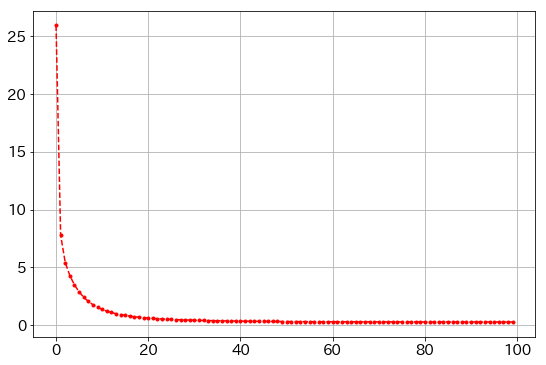

In [567]:
plt.plot(num, Train_loss_data, color='red',  linestyle='--', marker='.')
plt.grid(True)

In [568]:
print('train_loss = ' + str(train_loss) )

train_loss = 0.26226482


**図3.12:評価用データに対する実測値と推定値**

Text(0,0.5,'住宅価格(標準化後)')

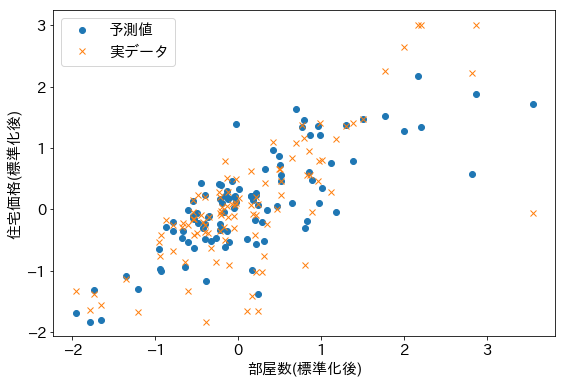

In [569]:
plt.plot(x_test[:, 5], pred_, 'o', label='予測値')
plt.plot(x_test[:, 5], y_test, 'x', label='実データ')
plt.legend(loc='upper left')
plt.xlabel('部屋数(標準化後)')
plt.ylabel('住宅価格(標準化後)')

**リスト3.21:ミニバッチを1つずつ返すジェネレータ**

In [570]:
import numpy as np


def get_batches(x, y, batch_size):
    n_data = len(x)
    indices = np.arange(n_data)
    np.random.shuffle(indices)
    x_shuffled = x[indices]
    y_shuffled = y[indices]
    
    # 元データからランダムに batch_size 個ずつ抽出する
    for i in range(0, n_data, batch_size):
        x_batch = x_shuffled[i: i + batch_size]
        y_batch = y_shuffled[i: i + batch_size]
        yield x_batch, y_batch

**リスト3.22:ミニバッチを用いた学習**

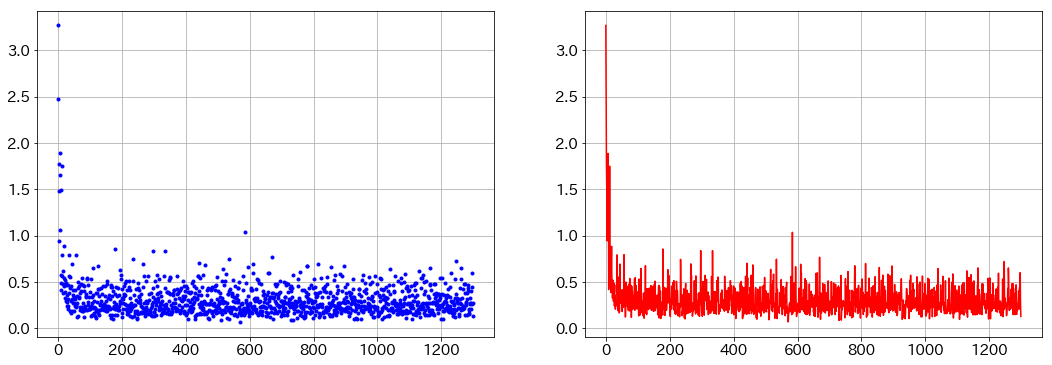

In [624]:
# ミニバッチのサイズ
BATCH_SIZE = 32
Train_loss_data_E = np.zeros(100)
num_E = np.zeros(100)

for n in range(100):
    num_E[n]=n

Train_loss_data = np.zeros(100*13)
num = np.zeros(100*13)

for n in range(100*13):
    num[n]=n
    
step = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # 100エポック回す
    for epoch in range(100):
        train_loss_s = 0
        for x_batch, y_batch in get_batches(x_train, y_train, 32):
            train_loss, _ = sess.run(
                [loss, train_step],
                feed_dict={
                    x: x_batch,
                    y: y_batch.reshape((-1, 1))
                }
            )
            # print('step: {}, train_loss: {}'.format(step, train_loss)) # 数列ではなくて、下記グラフの表示に変更
            step += 1
            Train_loss_data[step-1] = train_loss
            train_loss_s = train_loss_s + train_loss
            #print('train_loss_s = ',train_loss_s)
        #Train_loss_data_E[epoch-1] = train_loss_s/13 #　1個ズレる
        Train_loss_data_E[epoch] = train_loss_s/13 #　ズレ無い
        #print('Train_loss_data_E[',epoch,'] = ',Train_loss_data_E[epoch])
    pred_ = sess.run(
        pred,
        feed_dict={
            x: x_test
        }
    )

plt.figure(figsize=(18, 6)) # figureの縦横の大きさ
plt.subplot(1, 2, 1)
plt.plot(num, Train_loss_data, color='blue',  linestyle='none', marker='.')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(num, Train_loss_data, color='red',  linestyle='-')
plt.grid(True)

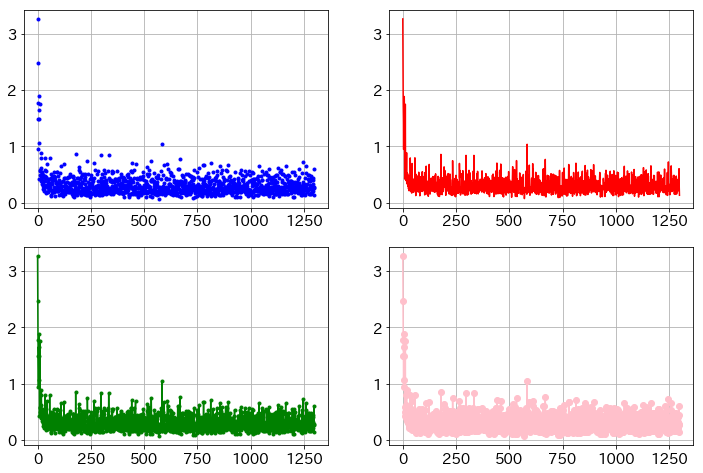

In [626]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# 左上
ax[0, 0].plot(num, Train_loss_data, color='blue',  linestyle='none', marker='.')
ax[0, 0].grid(True)
# 右上
ax[0, 1].plot(num, Train_loss_data, color='red',  linestyle='-')
ax[0, 1].grid(True)
# 左下
ax[1, 0].plot(num, Train_loss_data, color='green',  linestyle='-', marker='.')
ax[1, 0].grid(True)
# 右下
ax[1, 1].plot(num, Train_loss_data, color='pink',  linestyle='-', marker='o')
ax[1, 1].grid(True)


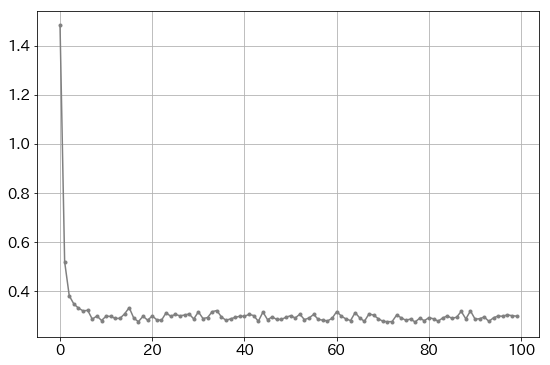

In [627]:
plt.plot(num_E, Train_loss_data_E, color='gray',  linestyle='-', marker='.')
plt.grid(True)

In [1]:
from IPython.display import HTML

HTML("""
<button id="code-show-switch-btn">スクリプトを非表示にする</button>

<script>
var code_show = true;

function switch_display_setting() {
    var switch_btn = $("#code-show-switch-btn");
    if (code_show) {
        $("div.input").hide();
        code_show = false;
        switch_btn.text("スクリプトを表示する");
    }else {
        $("div.input").show();
        code_show = true;
        switch_btn.text("スクリプトを非表示にする");
    }
}

$("#code-show-switch-btn").click(switch_display_setting);
</script>
""")